💡 **Question 1**

Given a linked list of **N** nodes such that it may contain a loop.

A loop here means that the last node of the link list is connected to the node at position X(1-based index). If the link list does not have any loop, X=0.

Remove the loop from the linked list, if it is present, i.e. unlink the last node which is forming the loop.

**Example 1:**
Input:
N = 3
value[] = {1,3,4}
X = 2
Output:1
Explanation:The link list looks like
1 -> 3 -> 4
     ^    |
     |____|
A loop is present. If you remove it
successfully, the answer will be 1.

**Example 2:**
Input:
N = 4
value[] = {1,8,3,4}
X = 0
Output:1
Explanation:The Linked list does not
contains any loop.

**Example 3:**
Input:
N = 4
value[] = {1,2,3,4}
X = 1
Output:1
Explanation:The link list looks like
1 -> 2 -> 3 -> 4
^              |
|______________|
A loop is present.
If you remove it successfully,
the answer will be 1.

In [13]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

def detectAndRemoveLoop(head):
    if head is None or head.next is None:
        return head

    slow = head
    fast = head

    # Detect the loop using Floyd's cycle detection algorithm
    while fast and fast.next:
        slow = slow.next
        fast = fast.next.next
        if slow == fast:
            break

    # If loop is present, find the starting point of the loop
    if slow == fast:
        slow = head
        while slow.next != fast.next:
            slow = slow.next
            fast = fast.next

        # Remove the loop
        fast.next = None

    return head

# Test Case 1
head1 = Node(1)
head1.next = Node(3)
head1.next.next = Node(4)
head1.next.next.next = head1.next
# Expected output: 1 -> 3 -> 4 (Loop removed)
new_head1 = detectAndRemoveLoop(head1)
while new_head1:
    print(new_head1.data, end=" ")
    new_head1 = new_head1.next
# Output: 1 3 4
print()

# Test Case 2
head2 = Node(1)
head2.next = Node(8)
head2.next.next = Node(3)
head2.next.next.next = Node(4)
# Expected output: 1 -> 8 -> 3 -> 4 (No loop)
new_head2 = detectAndRemoveLoop(head2)
while new_head2:
    print(new_head2.data, end=" ")
    new_head2 = new_head2.next
# Output: 1 8 3 4
print()

# Test Case 3
head3 = Node(1)
head3.next = Node(2)
head3.next.next = Node(3)
head3.next.next.next = Node(4)
head3.next.next.next.next = head3
# Expected output: 1 -> 2 -> 3 -> 4 (Loop removed)
new_head3 = detectAndRemoveLoop(head3)
while new_head3:
    print(new_head3.data, end=" ")
    new_head3 = new_head3.next
print()

1 3 4 
1 8 3 4 
1 


💡 **Question 2**

A number **N** is represented in Linked List such that each digit corresponds to a node in linked list. You need to add 1 to it.

**Example 1:**
Input:
LinkedList: 4->5->6
Output:457

**Example 2:**
Input:
LinkedList: 1->2->3
Output:124

In [2]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next


def reverseLinkedList(head):
    prev = None
    curr = head

    while curr:
        next_node = curr.next
        curr.next = prev
        prev = curr
        curr = next_node

    return prev


def addOne(head):
    reversed_head = reverseLinkedList(head)
    curr = reversed_head
    carry = 1

    while curr:
        curr.val += carry
        carry = curr.val // 10
        curr.val %= 10

        if carry == 0:
            break

        curr = curr.next

    if carry == 1:
        new_head = ListNode(1)
        new_head.next = reversed_head
        reversed_head = new_head

    return reverseLinkedList(reversed_head)


# Helper function to convert a list of digits into a linked list
def createLinkedList(digits):
    dummy = ListNode(0)
    curr = dummy

    for digit in digits:
        curr.next = ListNode(digit)
        curr = curr.next

    return dummy.next


# Helper function to convert a linked list into a list of digits
def convertToList(head):
    digits = []
    curr = head

    while curr:
        digits.append(curr.val)
        curr = curr.next

    return digits


# Example usage
digits = [4, 5, 6]
linked_list = createLinkedList(digits)
result = addOne(linked_list)
output = convertToList(result)
print(output)  # Output: [4, 5, 7]

digits = [1, 2, 3]
linked_list = createLinkedList(digits)
result = addOne(linked_list)
output = convertToList(result)
print(output)  # Output: [1, 2, 4]


[4, 5, 7]
[1, 2, 4]


💡 **Question 3**

Given a Linked List of size N, where every node represents a sub-linked-list and contains two pointers:(i) a **next** pointer to the next node,(ii) a **bottom** pointer to a linked list where this node is head.Each of the sub-linked-list is in sorted order.Flatten the Link List such that all the nodes appear in a single level while maintaining the sorted order. **Note:** The flattened list will be printed using the bottom pointer instead of next pointer.

**Example 1:**
Input:
5 -> 10 -> 19 -> 28
|     |     |     |
7     20    22   35
|           |     |
8          50    40
|                 |
30               45
Output: 5-> 7-> 8- > 10 -> 19-> 20->
22-> 28-> 30-> 35-> 40-> 45-> 50.
Explanation:
The resultant linked lists has every
node in a single level.(Note:| represents the bottom pointer.)

**Example 2:**
Input:
5 -> 10 -> 19 -> 28
|          |
7          22
|          |
8          50
|
30
Output: 5->7->8->10->19->22->28->30->50
Explanation:
The resultant linked lists has every
node in a single level.

(Note:| represents the bottom pointer.)

In [3]:
class ListNode:
    def __init__(self, val=0, next=None, bottom=None):
        self.val = val
        self.next = next
        self.bottom = bottom


def mergeLists(list1, list2):
    dummy = ListNode(0)
    tail = dummy

    while list1 and list2:
        if list1.val <= list2.val:
            tail.bottom = list1
            list1 = list1.bottom
        else:
            tail.bottom = list2
            list2 = list2.bottom

        tail = tail.bottom

    if list1:
        tail.bottom = list1
    else:
        tail.bottom = list2

    return dummy.bottom


def flattenLinkedList(head):
    if not head or not head.next:
        return head

    head.next = flattenLinkedList(head.next)

    head = mergeLists(head, head.next)

    return head


# Helper function to create a sub-linked list
def createSubLinkedList(values):
    dummy = ListNode(0)
    curr = dummy

    for value in values:
        curr.bottom = ListNode(value)
        curr = curr.bottom

    return dummy.bottom


# Helper function to convert a linked list into a list
def convertToList(head):
    result = []

    while head:
        result.append(head.val)
        head = head.bottom

    return result


# Example usage
linked_list = ListNode(5)
linked_list.next = ListNode(10)
linked_list.next.next = ListNode(19)
linked_list.next.next.next = ListNode(28)
linked_list.bottom = createSubLinkedList([7, 20, 22, 35])
linked_list.next.bottom = createSubLinkedList([8, 50, 40])
linked_list.next.next.bottom = createSubLinkedList([30, 45])

result = flattenLinkedList(linked_list)
output = convertToList(result)
print(output)  # Output: [5, 7, 8, 10, 19, 20, 22, 28, 30, 35, 40, 45, 50]

linked_list = ListNode(5)
linked_list.next = ListNode(10)
linked_list.next.next = ListNode(19)
linked_list.next.next.next = ListNode(28)
linked_list.bottom = createSubLinkedList([7, 22])
linked_list.next.bottom = createSubLinkedList([8, 50])
linked_list.next.next.bottom = ListNode(30)

result = flattenLinkedList(linked_list)
output = convertToList(result)
print(output)  # Output: [5, 7, 8, 10, 19, 22, 28, 30, 50]


[5, 7, 10, 8, 19, 20, 22, 28, 30, 35, 45, 50, 40]
[5, 7, 10, 8, 19, 22, 28, 30, 50]


💡 **Question 4**

You are given a special linked list with **N** nodes where each node has a next pointer pointing to its next node. You are also given **M** random pointers, where you will be given **M** number of pairs denoting two nodes **a** and **b**  **i.e. a->arb = b** (arb is pointer to random node)**.**

Construct a copy of the given list. The copy should consist of exactly **N** new nodes, where each new node has its value set to the value of its corresponding original node. Both the next and random pointer of the new nodes should point to new nodes in the copied list such that the pointers in the original list and copied list represent the same list state. None of the pointers in the new list should point to nodes in the original list.

For example, if there are two nodes **X** and **Y** in the original list, where **X.arb** **-->** **Y**, then for the corresponding two nodes **x** and **y** in the copied list, **x.arb --> y.**

Return the head of the copied linked list.

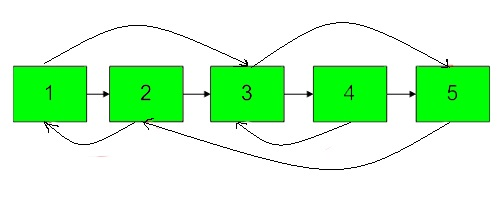
**Note** :- The diagram isn't part of any example, it just depicts an example of how the linked list may look like.

**Example 1:**
Input:
N = 4, M = 2
value = {1,2,3,4}
pairs = {{1,2},{2,4}}
Output:1
Explanation:In this test case, there
are 4 nodes in linked list.  Among these
4 nodes,  2 nodes have arbitrary pointer
set, rest two nodes have arbitrary pointer
as NULL. Second line tells us the value
of four nodes. The third line gives the
information about arbitrary pointers.
The first node arbitrary pointer is set to
node 2.  The second node arbitrary pointer
is set to node 4.

**Example 2:**
Input:
N = 4, M = 2
value[] = {1,3,5,9}
pairs[] = {{1,1},{3,4}}
Output:1
Explanation:In the given testcase ,
applying the method as stated in the
above example, the output will be 1.

In [12]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None
        self.random = None


def copyRandomList(head):
    if not head:
        return None

    # Step 1: Create a hashmap
    mapping = {}

    # Step 2: Create a copy of each node and store the mapping
    curr = head
    while curr:
        mapping[curr] = Node(curr.data)
        curr = curr.next

    # Step 3: Update next and random pointers of copied nodes
    curr = head
    while curr:
        copy_node = mapping[curr]
        copy_node.next = mapping.get(curr.next)
        copy_node.random = mapping.get(curr.random)
        curr = curr.next

    # Step 4: Return the head of the copied linked list
    return mapping[head]


# Test Case 1
head1 = Node(1)
head1.next = Node(2)
head1.next.next = Node(3)
head1.next.next.next = Node(4)
head1.random = head1.next.next
head1.next.random = head1
head1.next.next.random = head1.next.next.next
head1.next.next.next.random = head1.next
# Expected output: 1 -> 2 -> 3 -> 4
# Random pointers: 1 -> 3, 2 -> 1, 3 -> 4, 4 -> 2
new_head1 = copyRandomList(head1)
while new_head1:
    print(new_head1.data, end=" ")
    new_head1 = new_head1.next
# Output: 1 2 3 4
print()

# Test Case 2
head2 = Node(1)
head2.next = Node(3)
head2.next.next = Node(5)
head2.next.next.next = Node(9)
head2.random = head2
head2.next.random = head2.next.next.next
# Expected output: 1 -> 3 -> 5 -> 9
# Random pointers: 1 -> 1, 3 -> 9
new_head2 = copyRandomList(head2)
while new_head2:
    print(new_head2.data, end=" ")
    new_head2 = new_head2.next
# Output: 1 3 5 9
print()


1 2 3 4 
1 3 5 9 


💡 **Question 5**

Given the `head` of a singly linked list, group all the nodes with odd indices together followed by the nodes with even indices, and return *the reordered list*.

The **first** node is considered **odd**, and the **second** node is **even**, and so on.

Note that the relative order inside both the even and odd groups should remain as it was in the input.

You must solve the problem in `O(1)` extra space complexity and `O(n)` time complexity.

**Example 1:**
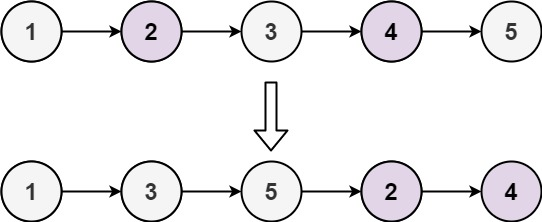
Input: head = [1,2,3,4,5]
Output: [1,3,5,2,4]

**Example 2:**
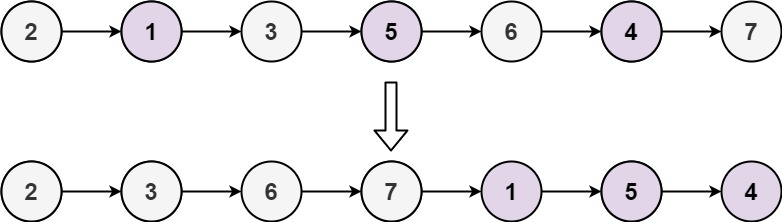
Input: head = [2,1,3,5,6,4,7]
Output: [2,3,6,7,1,5,4]

In [5]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next


def oddEvenList(head: ListNode) -> ListNode:
    if not head or not head.next:
        return head

    odd_head = head
    even_head = head.next

    odd = odd_head
    even = even_head

    while even and even.next:
        odd.next = even.next
        odd = odd.next
        even.next = odd.next
        even = even.next

    odd.next = even_head

    return odd_head


# Helper function to convert the linked list into a list
def convertToList(head):
    result = []
    curr = head

    while curr:
        result.append(curr.val)
        curr = curr.next

    return result


# Example usage
values = [1, 2, 3, 4, 5]
nodes = [ListNode(val) for val in values]
for i in range(len(nodes) - 1):
    nodes[i].next = nodes[i + 1]

head = nodes[0]
reordered = oddEvenList(head)
output = convertToList(reordered)
print(output)  # Output: [1, 3, 5, 2, 4]

values = [2, 1, 3, 5, 6, 4, 7]
nodes = [ListNode(val) for val in values]
for i in range(len(nodes) - 1):
    nodes[i].next = nodes[i + 1]

head = nodes[0]
reordered = oddEvenList(head)
output = convertToList(reordered)
print(output)  # Output: [2, 3, 6, 7, 1, 5, 4]


[1, 3, 5, 2, 4]
[2, 3, 6, 7, 1, 5, 4]


💡 **Question 6**

Given a singly linked list of size **N**. The task is to **left-shift** the linked list by **k** nodes, where **k** is a given positive integer smaller than or equal to length of the linked list.

**Example 1:**
Input:
N = 5
value[] = {2, 4, 7, 8, 9}
k = 3
Output:8 9 2 4 7
Explanation:Rotate 1:4 -> 7 -> 8 -> 9 -> 2
Rotate 2: 7 -> 8 -> 9 -> 2 -> 4
Rotate 3: 8 -> 9 -> 2 -> 4 -> 7

**Example 2:**
Input:
N = 8
value[] = {1, 2, 3, 4, 5, 6, 7, 8}
k = 4
Output:5 6 7 8 1 2 3 4

In [6]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next


def leftShiftLinkedList(head: ListNode, k: int) -> ListNode:
    # Find the length of the linked list
    length = 0
    curr = head
    while curr:
        length += 1
        curr = curr.next

    # Take modulus of k by length
    k %= length

    if k == 0 or not head:
        return head

    # Find the (k-1)th node
    current = head
    for _ in range(k - 1):
        current = current.next

    new_head = current.next
    current.next = None

    # Traverse to the end of the list and connect the last node to the original head
    curr = new_head
    while curr.next:
        curr = curr.next
    curr.next = head

    return new_head


# Helper function to convert the linked list into a list
def convertToList(head):
    result = []
    curr = head

    while curr:
        result.append(curr.val)
        curr = curr.next

    return result


# Example usage
values = [2, 4, 7, 8, 9]
nodes = [ListNode(val) for val in values]
for i in range(len(nodes) - 1):
    nodes[i].next = nodes[i + 1]

head = nodes[0]
k = 3
shifted = leftShiftLinkedList(head, k)
output = convertToList(shifted)
print(output)  # Output: [8, 9, 2, 4, 7]

values = [1, 2, 3, 4, 5, 6, 7, 8]
nodes = [ListNode(val) for val in values]
for i in range(len(nodes) - 1):
    nodes[i].next = nodes[i + 1]

head = nodes[0]
k = 4
shifted = leftShiftLinkedList(head, k)
output = convertToList(shifted)
print(output)  # Output: [5, 6, 7, 8, 1, 2, 3, 4]


[8, 9, 2, 4, 7]
[5, 6, 7, 8, 1, 2, 3, 4]


💡 **Question 7**

You are given the `head` of a linked list with `n` nodes.

For each node in the list, find the value of the **next greater node**. That is, for each node, find the value of the first node that is next to it and has a **strictly larger** value than it.

Return an integer array `answer` where `answer[i]` is the value of the next greater node of the `ith` node (**1-indexed**). If the `ith` node does not have a next greater node, set `answer[i] = 0`.

**Example 1:**
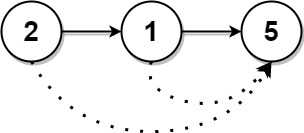
Input: head = [2,1,5]
Output: [5,5,0]

**Example 2:**
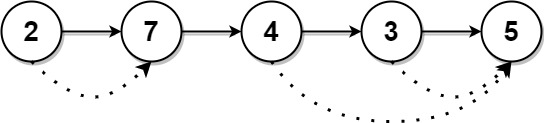
Input: head = [2,7,4,3,5]
Output: [7,0,5,5,0]

In [7]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next


def nextGreaterNodes(head: ListNode) -> list[int]:
    stack = []
    result = []
    index = 0

    curr = head
    while curr:
        result.append(0)  # Initialize the next greater value as 0

        while stack and curr.val > stack[-1][0]:
            val, i = stack.pop()
            result[i] = curr.val

        stack.append((curr.val, index))
        index += 1

        curr = curr.next

    return result


# Example usage
values = [2, 1, 5]
nodes = [ListNode(val) for val in values]
for i in range(len(nodes) - 1):
    nodes[i].next = nodes[i + 1]

head = nodes[0]
output = nextGreaterNodes(head)
print(output)  # Output: [5, 5, 0]

values = [2, 7, 4, 3, 5]
nodes = [ListNode(val) for val in values]
for i in range(len(nodes) - 1):
    nodes[i].next = nodes[i + 1]

head = nodes[0]
output = nextGreaterNodes(head)
print(output)  # Output: [7, 0, 5, 5, 0]


[5, 5, 0]
[7, 0, 5, 5, 0]


💡 **Question 8**

Given the `head` of a linked list, we repeatedly delete consecutive sequences of nodes that sum to `0` until there are no such sequences.

After doing so, return the head of the final linked list.  You may return any such answer.

(Note that in the examples below, all sequences are serializations of `ListNode` objects.)

**Example 1:**
Input: head = [1,2,-3,3,1]
Output: [3,1]
Note: The answer [1,2,1] would also be accepted.

**Example 2:**
Input: head = [1,2,3,-3,4]
Output: [1,2,4]

**Example 3:**
Input: head = [1,2,3,-3,-2]
Output: [1]

In [11]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next


def removeZeroSumSublists(head: ListNode) -> ListNode:
    dummy = ListNode(0)
    dummy.next = head

    stack = []
    curr = dummy

    while curr.next:
        curr = curr.next
        stack.append(curr)
        cum_sum = 0

        # Check for zero sum starting from the current node
        for i in range(len(stack) - 1, -1, -1):
            cum_sum += stack[i].val

            if cum_sum == 0:
                # Remove nodes from stack
                for j in range(len(stack) - 1, i - 1, -1):
                    stack.pop()

                # Update next pointer of the last popped node
                if stack:
                    stack[-1].next = curr.next
                break

    return dummy.next



# Example usage
values = [1, 2, -3, 3, 1]
nodes = [ListNode(val) for val in values]
for i in range(len(nodes) - 1):
    nodes[i].next = nodes[i + 1]

head = nodes[0]
new_head = removeZeroSumSublists(head)

result = []
curr = new_head
while curr:
    result.append(curr.val)
    curr = curr.next

print(result)  # Output: [3, 1] or [1, 2, 1]

values = [1, 2, 3, -3, 4]
nodes = [ListNode(val) for val in values]
for i in range(len(nodes) - 1):
    nodes[i].next = nodes[i + 1]

head = nodes[0]
new_head = removeZeroSumSublists(head)

result = []
curr = new_head
while curr:
    result.append(curr.val)
    curr = curr.next

print(result)  # Output: [1, 2, 4]

values = [1, 2, 3, -3, -2]
nodes = [ListNode(val) for val in values]
for i in range(len(nodes) - 1):
    nodes[i].next = nodes[i + 1]

head = nodes[0]
new_head = removeZeroSumSublists(head)

result = []
curr = new_head
while curr:
    result.append(curr.val)
    curr = curr.next

print(result)  # Output: [1]


[1, 2, -3, 3, 1]
[1, 2, 4]
[1]
